In [2]:
import pandas as pd

In [3]:
import quandl

In [4]:
df = quandl.get("WIKI/GOOGL")

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [5]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [6]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

In [7]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [8]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, svm, preprocessing

import math

C:\Users\Peeyush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
forecast_out = int(math.ceil(0.005*len(df)))
forecast_col='Adj. Close'

In [11]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [12]:
df.dropna(inplace=True)

In [13]:
import numpy as np
X= np.array(df.drop('label',1))
y=np.array(df['label'])

In [14]:
X=preprocessing.scale(X)

In [15]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [16]:
clf=svm.SVR()

In [17]:
clf.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
clf.score(X_test,y_test)

0.79452727906188036

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
clf= LinearRegression()

In [21]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.98963681139627246

In [22]:
clf = LinearRegression(n_jobs=-1)

In [23]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.98963681139627246

In [24]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.988682354746
poly 0.688564702118
rbf 0.794527279062
sigmoid 0.880184495666


In [25]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]

In [26]:
len(X_lately)

17

In [27]:
len(X)

3376

In [28]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-01-10,1110.14,0.792693,0.283650,1027781.0,1068.76
2018-01-11,1111.88,0.752779,-0.038658,1102461.0,1084.43
2018-01-12,1130.65,2.059877,1.851185,1914460.0,1055.41
2018-01-16,1130.70,1.965154,-0.842753,1783881.0,1005.60
2018-01-17,1139.10,1.389694,0.241121,1353097.0,1043.43


In [29]:
X = X[:-forecast_out]

In [30]:
len(X)

3359

In [31]:
df.dropna(inplace=True)

y_lately = y[-forecast_out:]
y = np.array(df['label'])
y = y[:-forecast_out]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.988487230089


In [32]:
forecast_set  = clf.predict(X_lately)

In [33]:
print(forecast_set, confidence, forecast_out)

[ 1082.19231517  1080.34779061  1077.11020713  1071.46364698  1067.13028347
  1064.70594706  1083.68087951  1102.18299992  1107.18596153  1121.62428306
  1125.75408129  1124.37395197  1121.68316845  1123.48630665  1141.51693835
  1141.99859356  1150.58130343] 0.988487230089 17


In [34]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [35]:
style.use('ggplot')

In [36]:
df['Forecast'] = np.nan

In [37]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [53]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc['next_date']=[np.nan for _ in range(len(df.columns)-1)]+[i]

In [52]:
df.tail(10)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-01-04 00:00:00,1095.76,0.896182,-0.121230,1289293.0,1177.37,NaN
2018-01-05 00:00:00,1110.29,1.060984,0.619874,1493389.0,1182.22,NaN
2018-01-08 00:00:00,1114.21,0.822107,0.288929,1148958.0,1181.59,NaN
2018-01-09 00:00:00,1112.79,0.920210,-0.505168,1335995.0,1119.20,NaN
2018-01-10 00:00:00,1110.14,0.792693,0.283650,1027781.0,1068.76,NaN
2018-01-11 00:00:00,1111.88,0.752779,-0.038658,1102461.0,1084.43,NaN
2018-01-12 00:00:00,1130.65,2.059877,1.851185,1914460.0,1055.41,NaN
2018-01-16 00:00:00,1130.70,1.965154,-0.842753,1783881.0,1005.60,NaN
2018-01-17 00:00:00,1139.10,1.389694,0.241121,1353097.0,1043.43,NaN


In [40]:
df1 = pd.DataFrame([[1, 2], [3, 4]], index=['A', 'B'], columns=['X', 'Y'])

In [41]:
df1

,X,Y
A,1,2
B,3,4


In [42]:
df1.loc['A']

X    1
Y    2
Name: A, dtype: int64

In [43]:
df1.loc[['B', 'A'], 'X']

B    3
A    1
Name: X, dtype: int64

In [44]:
df1.loc[['B', 'A'], ['X']]

,X
B,3
A,1


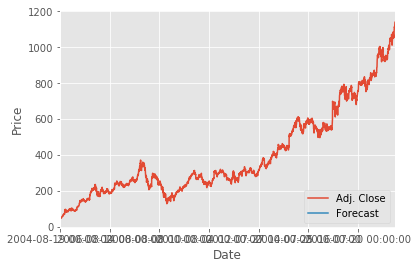

In [45]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [54]:
import pickle


In [55]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf,f)

In [56]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

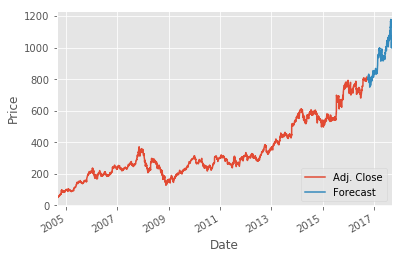

In [59]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
#COMMENTED OUT:
##clf = svm.SVR(kernel='linear')
##clf.fit(X_train, y_train)
##confidence = clf.score(X_test, y_test)
##print(confidence)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()